<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Curva_de_Weibull_windshield.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weibull Analysis



In [1]:
!pip install lifelines

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 7.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=23bde331c04346c8b828a3a789342c6ab1c684f706cbba9de00d81da065ced7e
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Weibull short example

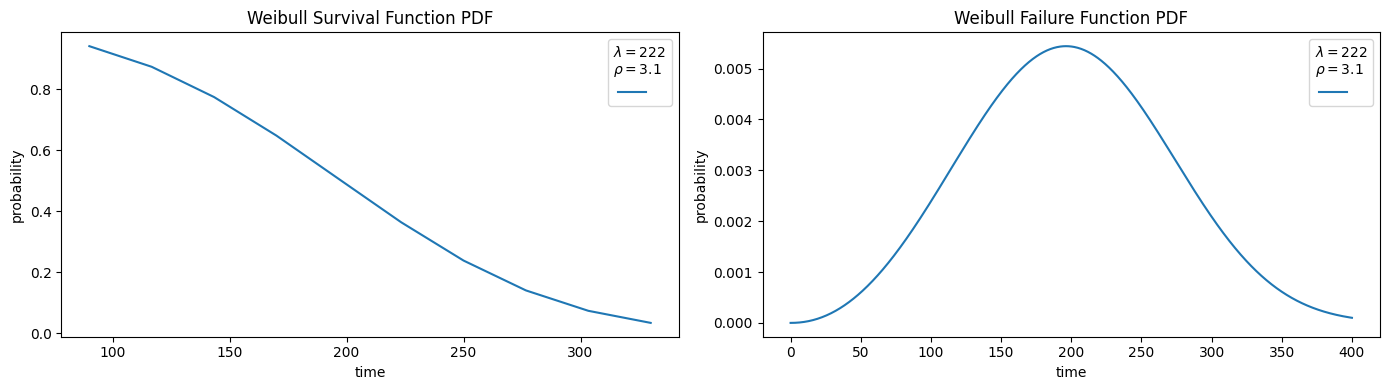

In [24]:
from lifelines import WeibullFitter

wb = WeibullFitter()

dados_ocorrencias = np.array([140, 90, 190, 220, 270, 200, 115, 170, 260, 330])
dados_observed = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

wb.fit(durations=dados_ocorrencias,event_observed=dados_observed)

fig, ax = plt.subplots(1,2,figsize=(14,4))

ax[0].plot(wb.survival_function_,label=' ')
ax[1].plot(wb.density_at_times(np.linspace(0,400,1000)),label=' ')

ax[0].set_title('Weibull Survival Function PDF')
ax[1].set_title('Weibull Failure Function PDF')
ax[0].set_xlabel('time')
ax[0].set_ylabel('probability')
ax[1].set_xlabel('time')
ax[1].set_ylabel('probability')

ax[0].legend(title='$\\lambda = $' + str(int(wb.lambda_)) + '\n' + '$\\rho = $' + str(np.round(wb.rho_,2)))
ax[1].legend(title='$\\lambda = $' + str(int(wb.lambda_)) + '\n' + '$\\rho = $' + str(np.round(wb.rho_,2)))

plt.tight_layout()
plt.show()

# Windshield Data

In [27]:
df = pd.read_excel('https://github.com/Rogerio-mack/work/raw/main/Dados_analise_weibull_Janelas.xlsx')
df.head()

,141A4800-1,141A4800-2,5-89354-3150
0,13186,29121.0,16129.0
1,29450,13235.0,25704.0
2,15191,14538.0,4486.0
3,24921,2340.0,22166.0
4,14538,21536.0,37035.0


## sort values

In [28]:
for c in df:
  df[c] = df[c].sort_values().values
  df[c] = df[c].astype('float')
  df[c + 'obs'] = df[c] >= 0
  df[c + 'obs'] = df[c + 'obs'].astype('int')

df = df.fillna(0)
display(df.head())
display(df.tail())

,141A4800-1,141A4800-2,5-89354-3150,141A4800-1obs,141A4800-2obs,5-89354-3150obs
0,112.0,191.0,1051.0,1,1,1
1,169.0,1316.0,4439.0,1,1,1
2,2067.0,1906.0,4455.0,1,1,1
3,2478.0,2340.0,4486.0,1,1,1
4,2634.0,3505.0,7104.0,1,1,1


,141A4800-1,141A4800-2,5-89354-3150,141A4800-1obs,141A4800-2obs,5-89354-3150obs
61,31517.0,0.0,0.0,1,0,0
62,32684.0,0.0,0.0,1,0,0
63,33005.0,0.0,0.0,1,0,0
64,34417.0,0.0,0.0,1,0,0
65,42505.0,0.0,0.0,1,0,0


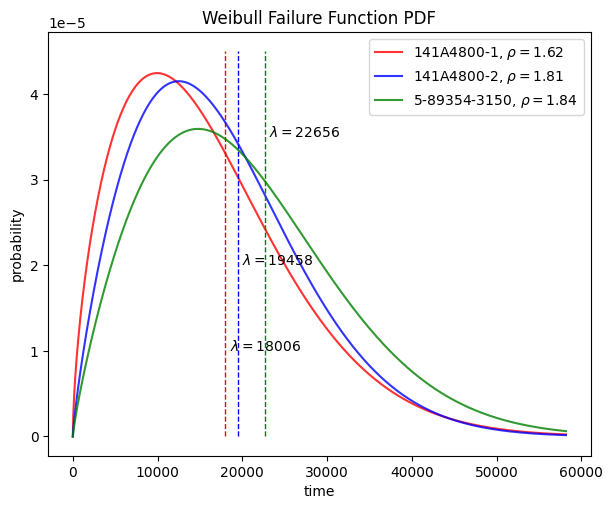

In [40]:
from lifelines import WeibullFitter

plt.figure(figsize=(7,5.5))

wb = WeibullFitter()

for c, color, pos in zip([x for x in df.columns if not 'obs' in x], ['red','blue','green'], [1,2,3.5]):
  wb.fit(durations=df[ df[c] > 0 ][c],event_observed=df[ df[c] > 0 ][c+'obs'])
  plt.plot(wb.density_at_times(np.linspace(0,df.max().max()*1.25,1000)),label=c + ', $\\rho = $' + str(np.round(wb.rho_,2)),c=color,alpha=0.8)
  # print(wb.lambda_, wb.rho_)

  plt.vlines(wb.lambda_,0,4.5*1e-5,linestyle='dashed',color=color,lw=1)
  plt.text(wb.lambda_+500,pos*1e-5,'$\\lambda = $' + str(int(wb.lambda_)))

plt.title('Weibull Failure Function PDF')
plt.xlabel('time')
plt.ylabel('probability')

plt.legend()
plt.show()


## $\lambda$, lambda

$\lambda$, represents time when 63% of devices failure. For last model...




In [45]:
1 - wb.predict(22656)

0.6321186816936074